# Simple PCA with Python

Trong phần này, chúng ta cùng làm một thử nghiệm nhỏ trên tập dữ liệu [Yale face database](https://drive.google.com/drive/folders/1KAKh8Tvb-WUnhkk4nMXnf1fHB78x1arU?usp=sharing). Các bức ảnh trong thí nghiệm này đã được căn chỉnh cho cùng với kích thước và khuôn mặt nằm trọn vẹn trong một hình chữ nhật có kích thước 116×98 pixel. Có tất cả 15 người khác nhau, mỗi người có 11 bức ảnh được chụp ở các điều kiện ánh sáng và cảm xúc khác nhau, bao gồm: ‘centerlight’, ‘glasses’, ‘happy’, ‘leftlight’, ‘noglasses’, ‘normal’, ‘rightlight’,’sad’, ‘sleepy’, ‘surprised’, và ‘wink’.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# Import essential libraries for scientific computing and data visualization
import numpy as np  # NumPy: library for numerical operations on arrays/matrices
import matplotlib.pyplot as plt  # Matplotlib: library for creating plots and displaying images

In [ ]:
# Configure the dataset parameters and file structure
path = '/content/drive/MyDrive/UIT_2025/Python_For_AI/imgs/'  # Directory path where all the face images are stored
ids = range(1, 16)  # Person IDs from 1 to 15 (total 15 different people)

# Different facial expressions and lighting conditions available for each person
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink' ]  # 11 different states per person

# File naming convention components
prefix = 'subject'  # All files start with "subject"
surfix = '.pgm'     # All files end with ".pgm" (Portable Gray Map image format)

# Image dimensions - each face image has the same size
h = 243  # height in pixels - how tall each image is
w = 320  # width in pixels - how wide each image is
D = h * w  # Total number of pixels per image (243 × 320 = 77,760 pixels)
N = len(states)*15  # Total number of images (11 states × 15 people = 165 images)

# Create a matrix to store all image data
# Each column will represent one flattened image (all pixels in a single column)
# Shape: (77,760 pixels) × (165 images)
X = np.zeros((D, N))

In [5]:
# Load all face images and convert them into a data matrix
cnt = 0  # Counter to keep track of which column we're filling in matrix X

# Loop through each person (1 to 15)
for person_id in range(1, 16):
    # For each person, loop through all their different states/expressions
    for state in states:
        # Construct the filename following the naming convention
        # Example: "subject01.normal.pgm" for person 1 in normal state
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        
        # Load the image file and flatten it into a 1D array
        # plt.imread() reads the image as a 2D array (height × width)
        # .reshape(D) converts it to 1D array of length D (77,760 pixels)
        # Store this flattened image as column 'cnt' in matrix X
        X[:, cnt] = plt.imread(fn).reshape(D)
        
        # Move to next column for the next image
        cnt += 1

In [6]:
# Import and apply Principal Component Analysis (PCA)
from sklearn.decomposition import PCA  # Import PCA from scikit-learn library

# Create PCA object with 100 principal components
# PCA reduces dimensionality from 77,760 pixels to just 100 important features
# These 100 components will capture the most important variations in face images
pca = PCA(n_components=100) # k = 100 components (much smaller than original 77,760)

# Train PCA on our data
# X.T transposes the matrix so each row is an image (required by sklearn)
# Original X: (77,760 pixels) × (165 images)
# X.T: (165 images) × (77,760 pixels)
# PCA learns the 100 most important directions of variation in the face data
pca.fit(X.T)

,n_components,100
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [7]:
# Extract the projection matrix from trained PCA
# pca.components_ contains the principal components (eigenvectors)
# Shape of pca.components_: (100 components) × (77,760 pixels)
# We transpose it to get U with shape: (77,760 pixels) × (100 components)
# U represents the 100 most important "face patterns" or "eigenfaces"
# Each column of U is an eigenface that captures a specific variation in faces
U = pca.components_.T

Hình  1


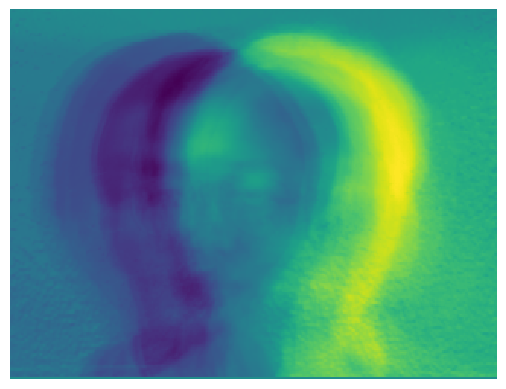

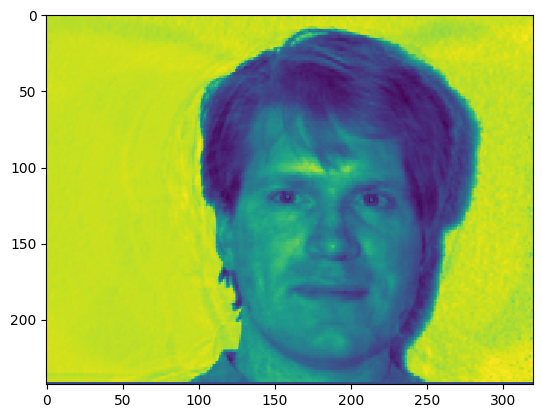

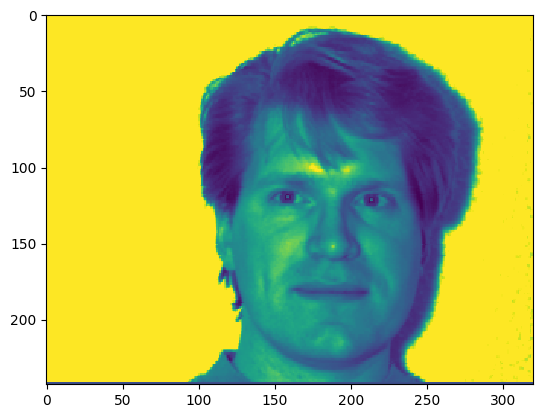

In [8]:
import matplotlib.pyplot as plt  # Import plotting library for visualization

# Demonstrate PCA compression and reconstruction for the first image
for i in range(1):  # Only process the first image (i=0)
  print("Hình ", i+1)  # Print image number in Vietnamese
  
  # Display the first eigenface (principal component)
  plt.axis('off')  # Remove axis labels and ticks for cleaner visualization
  # Reshape the first eigenface from 1D (77,760) back to 2D (243×320) for display
  # This shows what the most important face pattern looks like
  f1 = plt.imshow(U[:, i].reshape(243, 320), interpolation='nearest')
  plt.show()

  # COMPRESSION AND RECONSTRUCTION PROCESS:
  
  # Step 1: Prepare the image for PCA
  # Get the i-th image and reshape it to column vector, then subtract the mean face
  # This centers the data around zero, which is required for PCA
  x_hat = X[:, i].reshape(D, 1) - pca.mean_.reshape(D, 1)
  
  # Step 2: ENCODE - Compress the image using PCA
  # Project the centered image onto the 100-dimensional PCA space
  # This reduces 77,760 numbers to just 100 numbers!
  # z contains the coordinates of this image in the PCA space
  z = U.T.dot(x_hat)
  
  # Step 3: DECODE - Reconstruct the image from compressed representation
  # Transform back from 100-dimensional space to original 77,760-dimensional space
  # Add back the mean face to get the final reconstruction
  x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)
  
  # Display the reconstructed image
  # This shows how well PCA can recreate the original using only 100 components
  f1 = plt.imshow(x_tilde.reshape(243, 320), interpolation='nearest')
  plt.show()

  # Display the original image for comparison
  # Compare this with the reconstruction above to see the quality of compression
  f1 = plt.imshow(X[:, i].reshape(243, 320), interpolation='nearest')
  plt.show()